In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For clustering and classification
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
# pip install keras-tuner
from keras_tuner.tuners import RandomSearch

# Import train_test_split, cross_val_score and GridSearchCV functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# For TSA
# pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For sentiment analysis
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#pip install wordcloud
from wordcloud import WordCloud 
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

# Increase columns and rows for display to have a better view of the dataframe
pd.set_option("display.max_columns", 100)
pd.set_option("display.min_rows", 100)
%matplotlib inline

In [2]:
# Read dataset
daft_df = pd.read_csv('daft.csv')
daft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6986 non-null   float64
 1   floor_area       6986 non-null   float64
 2   beds             6986 non-null   float64
 3   baths            6986 non-null   float64
 4   property_type    6986 non-null   object 
 5   floor_area_unit  6986 non-null   object 
 6   price_sq_mt      6986 non-null   float64
dtypes: float64(5), object(2)
memory usage: 382.2+ KB


## Clustering

In [3]:
daft_df2 = daft_df[(daft_df['property_type'] == 'Apartment')|(daft_df['property_type'] == 'Detached')]
daft_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4880 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            4880 non-null   float64
 1   floor_area       4880 non-null   float64
 2   beds             4880 non-null   float64
 3   baths            4880 non-null   float64
 4   property_type    4880 non-null   object 
 5   floor_area_unit  4880 non-null   object 
 6   price_sq_mt      4880 non-null   float64
dtypes: float64(5), object(2)
memory usage: 305.0+ KB


In [4]:
# Selecting price and floor area features for analysis on apartment vs detached houses
x = daft_df2.iloc[:, [0, 1]].values

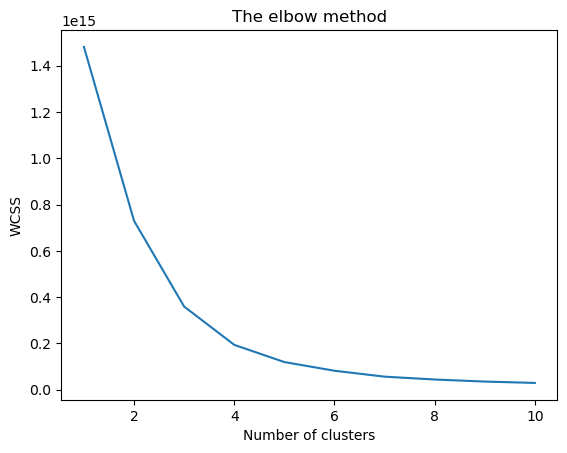

In [5]:
# Finding the optimum number of clusters

# Declare an array for the sum of the squared distance between each member of the cluster and its centroid.
wcss = []

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [6]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[3 0 2 ... 0 2 0]


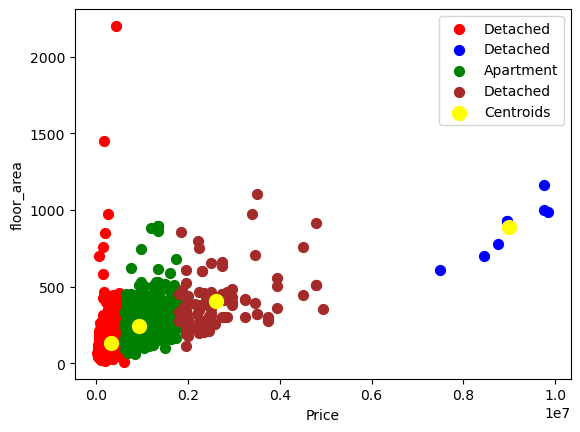

In [7]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Detached')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Detached')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Apartment')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'brown', label = 'Detached')
# For two clusters, remove the second last two python statements from the above four python statements

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Price')
plt.ylabel('floor_area')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend() 

## Classification

### RandomForestClassifier

Training set score: 0.99
Test set score: 0.75
              precision    recall  f1-score   support

   Apartment       0.83      0.85      0.84       444
    Detached       0.77      0.80      0.78      1044
      Semi-D       0.64      0.60      0.62       608

    accuracy                           0.75      2096
   macro avg       0.75      0.75      0.75      2096
weighted avg       0.75      0.75      0.75      2096

Cross validation accuracy mean: 0.74 +/- 0.03
Cross validation accuracy results: [0.77, 0.73, 0.76, 0.76, 0.77, 0.79, 0.75, 0.72, 0.75, 0.79, 0.7, 0.74, 0.69, 0.72, 0.75, 0.74, 0.74, 0.73, 0.74, 0.7]


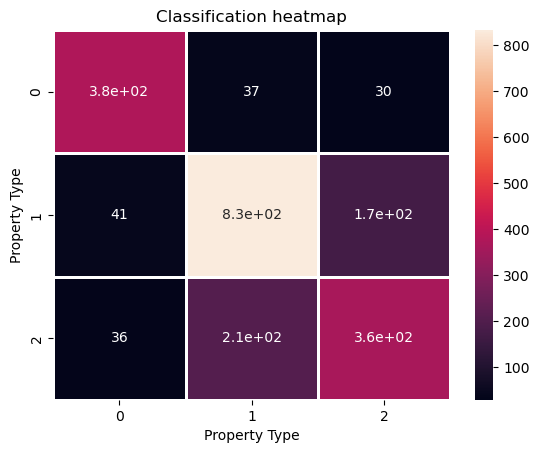

In [8]:
X = daft_df.drop(['property_type','floor_area_unit'], axis=1)
y = daft_df['property_type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create Classifier
RFclf1 = RandomForestClassifier(random_state=42) # default n_estimators = 100

# Train the model using the training sets
RFclf1.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = RFclf1.predict(X_test)

# Model Accuracy
print("Training set score: {:.2f}".format(RFclf1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RFclf1.score(X_test, y_test)))

# Calculate confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, linewidths = 2).set(title='Classification heatmap',xlabel='Property Type', ylabel='Property Type');

# print the classification_report based on y_test and y_predict
print(metrics.classification_report(y_test, y_pred))

# Cross validation
cv_scores = np.around(cross_val_score(RFclf1, X, y, scoring='accuracy', cv = 20),2).tolist()
cv_mean = round(np.mean(cv_scores),2)
cv_std = round(np.std(cv_scores),2)

print(f'Cross validation accuracy mean: {cv_mean} +/- {cv_std}')
print(f'Cross validation accuracy results: {cv_scores}')

In [9]:
# # Commented lines below: it takes too long to run, results commented in the code and report

# X = daft_df.drop(['property_type','floor_area_unit'], axis=1)
# y = daft_df['property_type']

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# # Initialise RandomForestClassifier
# rfclf = RandomForestClassifier()

# # parameter dictionary for GridSearchCV
# param_grid = {
#     'n_estimators': [100,500,700,900,1000],
#     'max_depth': [None,10,15,20,25,50]
# }

# # Modelling with GridSearchCV result
# rfclfgr = GridSearchCV(rfclf, param_grid, cv=10)
# rfclfgr.fit(X_train, y_train)

# print(rfclfgr.best_estimator_)

# # result --> RandomForestClassifier(max_depth=10, , n_estimators=700) 20 minutes to run

# # Make predictions on the testing set
# y_pred = rfclfgr.predict(X_test)

# # Model Accuracy
# print("Training set score: {:.2f}".format(rfclfgr.score(X_train, y_train))) # --> 0.87
# print("Test set score: {:.2f}".format(rfclfgr.score(X_test, y_test))) # --> 0.76

# # Calculate confusion_matrix
# cm = metrics.confusion_matrix(y_test, y_pred)

# # Call a method heatmap() to plot confusion matrix
# sns.heatmap(cm, annot = True, linewidths = 2).set(title='Classification heatmap',xlabel='Property Type', ylabel='Property Type');

# # print the classification_report based on y_test and y_predict
# print(metrics.classification_report(y_test, y_pred))

# # # Cross validation
# # cv_scores = np.around(cross_val_score(rfclfgr, X, y, scoring='accuracy', cv = 20),2).tolist()
# # cv_mean = round(np.mean(cv_scores),2)
# # cv_std = round(np.std(cv_scores),2)

# # print(f'Cross validation accuracy mean: {cv_mean} +/- {cv_std}')
# # print(f'Cross validation accuracy results: {cv_scores}')

# # Cross validation accuracy mean: 0.77 +/- 0.03
# # Cross validation accuracy results: [0.78, 0.76, 0.79, 0.78, 0.8, 0.81, 0.78, 0.75, 0.81, 0.81, 0.74, 0.78, 0.72, 0.74, 0.77, 0.75, 0.74, 0.76, 0.75, 0.7]

- GridSearchCV best estimator:
    - RandomForestClassifier(max_depth=10, , n_estimators=700)
- Model accuracy:
    - Training set score: 0.87
    - Test set score: 0.76
- Cross validation:
    - Cross validation accuracy mean: 0.77 +/- 0.03
    - Cross validation accuracy results: [0.78, 0.76, 0.79, 0.78, 0.8, 0.81, 0.78, 0.75, 0.81, 0.81, 0.74, 0.78, 0.72, 0.74, 0.77, 0.75, 0.74, 0.76, 0.75, 0.7]

### Artificial Neural Network

In [10]:
# In order to be able to train the model I need np array type target so first 
# encoding the target feature and then converting the resulting 3 columns into an array

daft_df3 = daft_df.copy()
daft_df3 = pd.get_dummies(data=daft_df3, columns=['property_type'])
daft_df3.head(2)

,price,floor_area,beds,baths,floor_area_unit,price_sq_mt,property_type_Apartment,property_type_Detached,property_type_Semi-D
0,2300000.0,600.0,6.0,5.0,m²,3833.0,0,1,0
1,499000.0,213.0,3.0,3.0,m²,2343.0,0,1,0


In [11]:
X = daft_df3.drop(['floor_area_unit','property_type_Apartment','property_type_Detached','property_type_Semi-D'], axis=1)
y = daft_df3[['property_type_Apartment', 'property_type_Detached', 'property_type_Semi-D']]

# convert the features and target variables to numpy arrays
X = np.array(X)
y = np.array(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Use standardized data
sc = StandardScaler()

# Train the model 
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [12]:
X_test[0], y_test[0]

(array([-0.36091565,  0.0282191 ,  0.49668445, -0.30385211, -0.70422131]),
 array([0, 1, 0], dtype=uint8))

In [13]:
# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 1s 87ms/step - loss: 1.0213 - accuracy: 0.5397 - val_loss: 0.9738 - val_accuracy: 0.6374
Epoch 2/50
5/5 [==============================] - 0s 28ms/step - loss: 0.9632 - accuracy: 0.6431 - val_loss: 0.9210 - val_accuracy: 0.6641
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.9150 - accuracy: 0.6710 - val_loss: 0.8747 - val_accuracy: 0.6694
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 0.8736 - accuracy: 0.6787 - val_loss: 0.8350 - val_accuracy: 0.6813
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.8373 - accuracy: 0.6828 - val_loss: 0.8013 - val_accuracy: 0.6870
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.8062 - accuracy: 0.6879 - val_loss: 0.7725 - val_accuracy: 0.6870
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.7797 - accuracy: 0.6928 - val_loss: 0.7487 - val_accuracy: 0.6875
Epoch 8/50
5/5 [===========

66/66 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7581
Test accuracy: 0.76
Test loss: 0.57


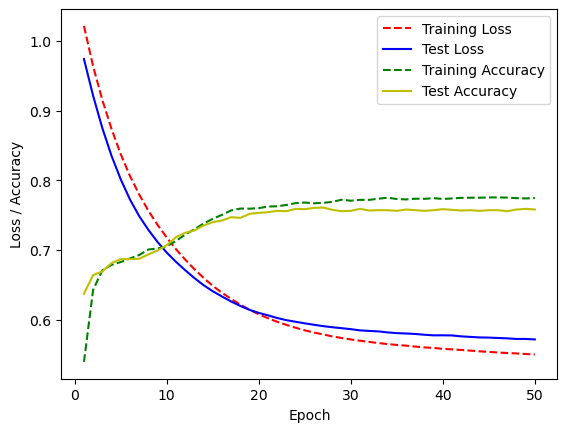

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}'.format(accuracy))
print('Test loss: {:.2f}'.format(loss))

# Get training and test loss and accuracy histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.plot(epoch_count, training_accuracy, "g--")
plt.plot(epoch_count, test_accuracy, "y-")
plt.legend(["Training Loss", "Test Loss", "Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.show();

### Use Keras tuner to try different combinations of layers and neurons

In [15]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(64, input_dim=5, activation='relu'))
    for i in range(hp.Int('layers',1,5)):
        model.add(Dense(
            units=hp.Int('units_'+ str(i),32,512,step=32),
            activation= 'relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
import os

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('/mydir'),
    project_name='keras_tuner'
)

# Note: in order to make this tuner work I had to create a directory C:\mydir (new folder called mydir in disk C main), 
# before it was failing to create the directory due to the use of backslashes as I found online.
# Keras documentation does not explain this in detail and it took a long research to solve this issue.
# but please read this note for replicability

In [17]:
tuner.search(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.7729007601737976

Best val_accuracy So Far: 0.774093508720398
Total elapsed time: 00h 01m 33s
INFO:tensorflow:Oracle triggered exit


In [18]:
tuner.results_summary()

Results summary
Results in \mydir\keras_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
layers: 4
units_0: 64
units_1: 128
units_2: 128
units_3: 96
units_4: 416
Score: 0.774093508720398

Trial 1 summary
Hyperparameters:
layers: 3
units_0: 384
units_1: 160
units_2: 192
units_3: 224
units_4: 224
Score: 0.7731393277645111

Trial 4 summary
Hyperparameters:
layers: 4
units_0: 192
units_1: 384
units_2: 512
units_3: 416
units_4: 384
Score: 0.7729007601737976

Trial 0 summary
Hyperparameters:
layers: 5
units_0: 224
units_1: 32
units_2: 32
units_3: 32
units_4: 32
Score: 0.7712309062480927

Trial 2 summary
Hyperparameters:
layers: 1
units_0: 352
units_1: 256
units_2: 480
units_3: 32
units_4: 128
Score: 0.7683683335781097


In [19]:
# Get the best model.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 96)                12384     
                                                                 
 dense_5 (Dense)             (None, 3)                 291       
                                                                 
Total params: 42,051
Trainable params: 42,051
Non-traina

#### tuner best_model

Model: "sequential"

 Layer (type)       /         Output Shape        /      Param   

 dense (Dense)      /         (None, 64)          /      384       
                                                                 
 dense_1 (Dense)    /         (None, 512)         /      33280     
                                                                 
 dense_2 (Dense)    /         (None, 3)           /      1539      
                              

In [20]:
# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 1s 61ms/step - loss: 1.0259 - accuracy: 0.5517 - val_loss: 0.9120 - val_accuracy: 0.6531
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.8749 - accuracy: 0.6658 - val_loss: 0.8001 - val_accuracy: 0.6818
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.7822 - accuracy: 0.6992 - val_loss: 0.7267 - val_accuracy: 0.7114
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.7187 - accuracy: 0.7188 - val_loss: 0.6820 - val_accuracy: 0.7228
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 0.6778 - accuracy: 0.7301 - val_loss: 0.6550 - val_accuracy: 0.7309
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 0.6497 - accuracy: 0.7405 - val_loss: 0.6369 - val_accuracy: 0.7343
Epoch 7/50
5/5 [==============================] - 0s 30ms/step - loss: 0.6297 - accuracy: 0.7481 - val_loss: 0.6241 - val_accuracy: 0.7462
Epoch 8/50
5/5 [===========

66/66 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7700
Test accuracy: 0.77
Test loss: 0.56


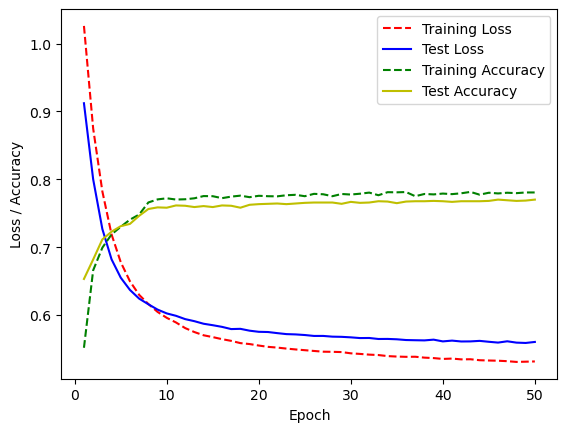

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}'.format(accuracy))
print('Test loss: {:.2f}'.format(loss))

# Get training and test loss and accuracy histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.plot(epoch_count, training_accuracy, "g--")
plt.plot(epoch_count, test_accuracy, "y-")
plt.legend(["Training Loss", "Test Loss", "Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.show();

## Time Series Analysis

In [22]:
# Read dataset 
rpi_df = pd.read_csv('res_price_index.csv')
rpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    2376 non-null   object 
 1   country                  2376 non-null   object 
 2   residential_price_index  2376 non-null   float64
 3   perc_change_prev         2376 non-null   float64
 4   perc_change_yoy          2376 non-null   float64
dtypes: float64(3), object(2)
memory usage: 92.9+ KB


In [23]:
rpi_df2 = rpi_df[rpi_df['country']=='IE']
rpi_df2 = rpi_df2[['month','residential_price_index']]
rpi_df2['month'] = pd.to_datetime(rpi_df2['month'], format='%Y-%m-%d')
rpi_df2.set_index('month', inplace=True)
rpi_df2.head(4)

,residential_price_index
month,
2001-01-01,73.3
2001-02-01,73.9
2001-03-01,74.5
2001-04-01,75.2


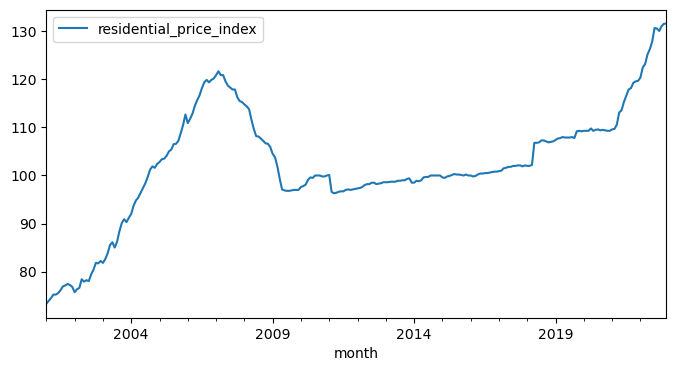

In [24]:
rpi_df2.plot(figsize=(8,4),legend=True);

### TSA with LinearRegression and RandomForestRegressor

In [25]:
# Creating input variable, price index of the previous month
rpi_df3 = rpi_df2.copy()
rpi_df3['rpi_prev1'] = rpi_df3['residential_price_index'].shift(+1)
rpi_df3.dropna(inplace=True)
rpi_df3

,residential_price_index,rpi_prev1
month,,
2001-02-01,73.9,73.3
2001-03-01,74.5,73.9
2001-04-01,75.2,74.5
2001-05-01,75.2,75.2
2001-06-01,75.5,75.2
2001-07-01,76.1,75.5
2001-08-01,76.9,76.1
2001-09-01,77.1,76.9
2001-10-01,77.4,77.1


In [26]:
X = rpi_df3['rpi_prev1']
y = rpi_df3['residential_price_index']

X,y = np.array(X), np.array(y)
X,y = X.reshape(-1,1), y.reshape(-1,1)

X_train, X_test, y_train, y_test = X[:-40], X[-40:], y[:-40], y[-40:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223, 1), (40, 1), (223, 1), (40, 1))

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [28]:
# test set mean
mean = y_test.mean()
print(f'Test set mean: {mean}')

# RandomForest Root Mean Square Error
rmse_rf = sqrt(metrics.mean_squared_error(rfr_pred,y_test))
print(f'RandomForest Root Mean Square Error: {rmse_rf}')

# LinearRegression Root Mean Square Error
rmse_lr = sqrt(metrics.mean_squared_error(lr_pred,y_test))
print(f'LinearRegression Root Mean Square Error: {rmse_lr}')

Test set mean: 116.57249999999999
RandomForest Root Mean Square Error: 4.327372716972882
LinearRegression Root Mean Square Error: 1.09151125605809


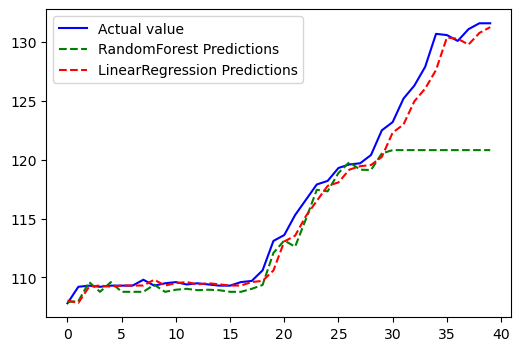

In [29]:
plt.rcParams['figure.figsize'] = (6,4)
plt.plot(y_test, 'b-', label='Actual value')
plt.plot(rfr_pred, 'g--', label='RandomForest Predictions')
plt.plot(lr_pred, 'r--', label='LinearRegression Predictions')
plt.legend(loc='upper left')
plt.show()

### Predictions into the future using ARIMA model

In [30]:
# Apply auto_arima function to get best combination of orders for the model and dataset provided
auto_arima(rpi_df2['residential_price_index'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=580.597, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=647.231, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=597.182, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=613.003, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=663.696, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=578.649, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=600.580, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=579.738, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=580.493, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=601.213, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=578.634, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=591.689, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=580.539, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=591.669, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=580.0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
# Split the model into training and testing but without taking to much from the tail 
# due to raising trend at the end, it would not be captured in the prediction
train=rpi_df2.iloc[:-12]
test=rpi_df2.iloc[-12:]
print(train.shape,test.shape)

(252, 1) (12, 1)


In [32]:
# Train the model with orders provided by auto_arima function
model=ARIMA(train['residential_price_index'],order=(2,1,1))
model=model.fit()
#model.summary()

In [33]:
# Prediction start and end index
start=len(train) #star to make prediction from the end of training set
end=len(train)+len(test)-1

# Make prediction
pred=model.predict(start=start,end=end,typ='levels')

In [34]:
mean = test['residential_price_index'].mean()
rmse = sqrt(mean_squared_error(pred,test['residential_price_index']))

print('mean = ', mean)
print('mean sqr err = ', rmse)

mean =  127.59999999999998
mean sqr err =  5.824925973224695


In [35]:
# Train the model with orders provided by auto_arima function and entire dataset
model2 = ARIMA(rpi_df2['residential_price_index'],order=(2,1,1))
model2 = model2.fit()

# Make predictions into the future, 24 months from final record
pred = model2.predict(start=len(rpi_df2), end=len(rpi_df2)+24, typ='levels').rename('ARIMA Predictions')
print(pred)

2023-01-01    132.044310
2023-02-01    132.535866
2023-03-01    133.017939
2023-04-01    133.482955
2023-05-01    133.930419
2023-06-01    134.360835
2023-07-01    134.774829
2023-08-01    135.173024
2023-09-01    135.556023
2023-10-01    135.924406
2023-11-01    136.278730
2023-12-01    136.619533
2024-01-01    136.947330
2024-02-01    137.262617
2024-03-01    137.565872
2024-04-01    137.857554
2024-05-01    138.138104
2024-06-01    138.407948
2024-07-01    138.667494
2024-08-01    138.917136
2024-09-01    139.157250
2024-10-01    139.388201
2024-11-01    139.610338
2024-12-01    139.823998
2025-01-01    140.029504
Freq: MS, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='month'>

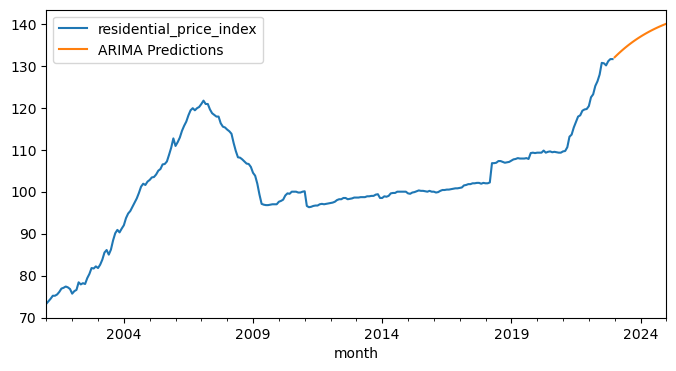

In [36]:
# Plot extended dataset with prediction
rpi_df2['residential_price_index'].plot(figsize=(8,4),legend=True)
pred.plot(legend=True)

## Sentiment Analysis

### News Topics

In [37]:
tj_df = pd.read_csv('theJournal.csv')
wc_df = pd.read_csv('worldconstructiontoday.csv')

data_raw_ireland = tj_df['0']
data_raw_world = wc_df['0']

# fix stop_words
stop_words_fixed = set(stopwords.words("english"))
stop_words_fixed.update(['.',',',':',"'",'’','%',"'s",'?','A','‘','”','“','say','said']) # add to set of stopwords

# Create and declare a function is_letter_only()
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

In [38]:
# Define topics function to avoid duplicated code
# args: 
#     data = news titles
#     t = num of topics
#     w = words per topic

def topics(data, t, w):
    lemmatizer = WordNetLemmatizer()

# Declare and create an empty array
    data_cleaned_lm = []

# Create a loop for all documents
    for title in data:
        title = str(title).lower()
        title_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in title.split() if is_letter_only(word)) # function is_letter_only described above
        data_cleaned_lm.append(title_cleaned)

# Declare and create an array (count_vector) by calling a method CountVectorizer()
    count_vector = CountVectorizer(stop_words = stop_words_fixed, max_features = None, max_df = 0.2, min_df = 2)

    data_cleaned = count_vector.fit_transform(data_cleaned_lm)    

# Declare and initialise an object 'lda' by calling a method LatentDirichletAllocation()
    lda = LatentDirichletAllocation(n_components = t, learning_method = 'batch', random_state = 42)

# Train the model
    lda.fit(data_cleaned)

# # Print all lda components
# print(lda.components_)

# Get all feature names
    terms = count_vector.get_feature_names_out()

# Print topics
    for topic_idx, topic in enumerate(lda.components_):
        print("Topic {}:" .format(topic_idx + 1))
        print(" ".join([terms[i] for i in topic.argsort()[-w:]]))

In [39]:
print('Irish "The Journal" three main topics on housing:')
topics(data_raw_ireland,3,6)

print('')

print('"World Construction Today" worldwide three main topics on housing:')
topics(data_raw_world,3,6)

Irish "The Journal" three main topics on housing:
Topic 1:
ha home minister new homeless people
Topic 2:
one taoiseach eviction crisis rent government
Topic 3:
year new price property house dublin

"World Construction Today" worldwide three main topics on housing:
Topic 1:
site ha equipment new world industry
Topic 2:
million awarded project new contract ha
Topic 3:
launch leading announced building ha technology


Topics from irish journal:
- new homes to homeless
- rent crisis/ eviction
- price new property in dublin

Topics from worldconstruction:
- new equipment for industry
- project contracts
- new building technology

### Irish news titles sentiment analysis

In [40]:
it_df = pd.read_csv('irish_times.csv')
it_df.head()

,title,description
0,Builders discuss the housing crisis: ‘If this ...,"Is the Government’s newest housing initiative,..."
1,Michael McDowell: Local authority housing powe...,At the very heart of the present Government’s ...
2,Ratings agency warns on economic price of Iris...,"DBRS Morningstar, which was alone among the wo..."
3,"Anne Enright on Dublin, A Writer’s City: every...",It used to be said that some people give direc...
4,Cliff Taylor: Will the new housing plan work a...,What has the Government done to try to get mor...


In [41]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict):
  
    polarity = "neutral"

    if(output_dict['compound'] >= 0.05):
        polarity = "positive"

    elif(output_dict['compound'] <= -0.05):
        polarity = "negative"

    return polarity

def predict_sentiment(text):
  
    output_dict =  sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

In [42]:
sent_data = pd.DataFrame(it_df['title'])
sent_data['vader_prediction'] = sent_data['title'].apply(predict_sentiment)
sent_data.sample(10)

,title,vader_prediction
288,The EU and housing crisis,negative
114,Kevin Barry House killing: What now for Housin...,negative
478,Miriam Lord: Shock as Minister for Housing fai...,negative
270,UK housing boom starts to fade as cost-of-livi...,neutral
612,Mount Merrion house moves with the times,neutral
713,Housing market grinds to a halt as Covid-19 cr...,negative
483,Q&A: What are the key details of the Governmen...,neutral
769,We are told houses are not over-priced. So how...,neutral
210,John FitzGerald: Pandemic savings have not yet...,neutral
553,New Government should adopt housing commission...,positive


In [43]:
# Display count labelled titles
sent_data['vader_prediction'].value_counts()

neutral     411
negative    297
positive    192
Name: vader_prediction, dtype: int64

In [44]:
# Display an example of ten news titles and sentiment prediction to see if it makes sense.
data_sample = sent_data.sample(10)
for i,j in zip(data_sample['title'], data_sample['vader_prediction']):
    print(f'News Title: {i}')
    print(f'VADER Sentiment Analysis: {j}')
    print('')

News Title: The housing crisis
VADER Sentiment Analysis: negative

News Title: ECB and housing policy
VADER Sentiment Analysis: neutral

News Title: Sinn Féin to bring forward Dáil motion declaring housing emergency
VADER Sentiment Analysis: negative

News Title: Renters who buy – even at elevated prices – will see their housing costs plunge
VADER Sentiment Analysis: neutral

News Title: Housing subsidies not providing value for money – PAC
VADER Sentiment Analysis: negative

News Title: Building public housing
VADER Sentiment Analysis: neutral

News Title: John FitzGerald: Pandemic savings have not yet hit house prices
VADER Sentiment Analysis: neutral

News Title: ‘No change’ in scale of institutional housing investment following new tax
VADER Sentiment Analysis: neutral

News Title: Breda O’Brien: Government's latest housing plan is doomed to failure
VADER Sentiment Analysis: negative

News Title: Cost of new houses in Dublin could be cut by €30,000, Dáil told
VADER Sentiment Analys

Word distribution of positives news titles from The Irish Times (192 articles)
<FreqDist with 808 samples and 1599 outcomes>
[('house', 114), ('housing', 76), ('price', 64), ('growth', 23), ('dublin', 16)]


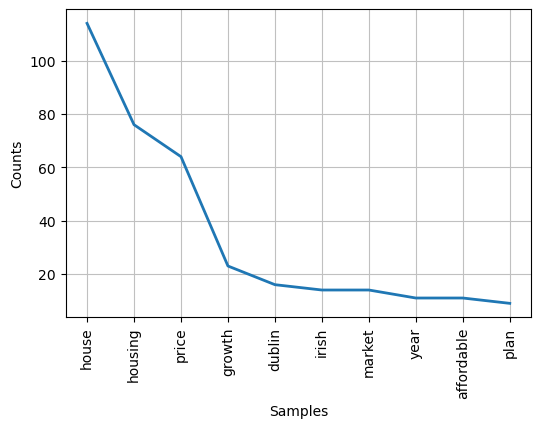


Word distribution of negatives news titles from The Irish Times (297 articles)
<FreqDist with 958 samples and 2301 outcomes>
[('housing', 225), ('crisis', 125), ('house', 77), ('price', 59), ('ireland', 26)]


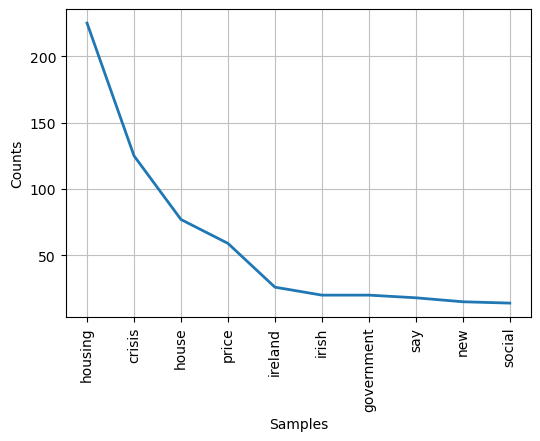

In [45]:
data_pos = sent_data.loc[sent_data['vader_prediction']== 'positive']['title'].tolist()
data_neg = sent_data.loc[sent_data['vader_prediction']== 'negative']['title'].tolist()

# Load and fix stop words
stop_words = set(stopwords.words("english"))
stop_words.update(['.',',',':',';',"'",'’','%',"'s",'?','A','‘','”','“','The','-']) # add to set of stopwords

def word_freq(data):
    tokenized = []
    
    for i in data:
        tokenized_word = word_tokenize(i)
        tokenized.extend(tokenized_word)
    
    filtered = []

    # Loop to filter words
    for w in tokenized:
        if w not in stop_words:
            w= w.lower()
            filtered.append(w)
    
    lem = WordNetLemmatizer()
    lemmatized = []

    # Store all the words into an array 'stemmed_words'
    for w in filtered:
        lemmatized.append(lem.lemmatize(w))
    
    # Frequency of word
    fdist = FreqDist(lemmatized)

    # Display the frequency distribution
    print(fdist)

    # Display the most common words
    print(fdist.most_common(5))

    fdist.plot(10, cumulative = False)
    plt.show()

print(f"Word distribution of positives news titles from The Irish Times ({len(data_pos)} articles)")
word_freq(data_pos)
print("")
print(f"Word distribution of negatives news titles from The Irish Times ({len(data_neg)} articles)")
word_freq(data_neg)

Positive words


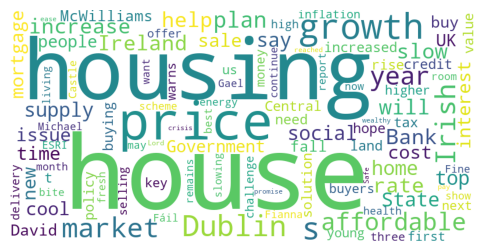

Negative words


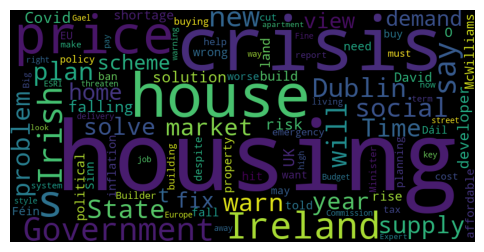

In [46]:
def wordcloud(x, color):
    wc = WordCloud(background_color=color, relative_scaling=0.5, max_words = 100, width = 800 , height = 400, collocations=False).generate(" ".join(x))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud(data_pos,'white')
print("Negative words")
wordcloud(data_neg,'black')

### Validate VADER sentiment prediction
Train other model with public labelled data and compare results with vader prediction on irish times titles

In [47]:
# Read public labelled data
labelled1 = pd.read_csv('amazon.txt', sep="\t", header=None)
labelled2 = pd.read_csv('imdb.txt', sep="\t", header=None)
labelled3 = pd.read_csv('yelp.txt', sep="\t", header=None)

# Create dataframe to train model
labelled = pd.concat([labelled1, labelled2, labelled3], ignore_index=True, sort=False)
labelled.columns = ["text", "polarity"]
labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2748 non-null   object
 1   polarity  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [48]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(labelled['text'])

#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, labelled['polarity'], test_size=0.25, random_state=0)

# Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.7889374090247453


MultinomialNB trained with 0.79 accuracy <br>
Now predict on Irish times

In [49]:
# Remove 'neutral' to match test dataset 'polarity' column
unlabelled = sent_data.drop(sent_data[sent_data.vader_prediction == 'neutral'].index).reset_index(drop=True)

# Match column names
unlabelled.rename(columns={'title': 'text','vader_prediction':'polarity'}, inplace=True)

# Replace values to match test dataset 'polarity' column
repl_dict = {'negative':0, 'positive':1}
unlabelled.replace({'polarity':repl_dict}, inplace=True)

new_df = pd.concat([labelled, unlabelled], ignore_index=False, sort=False).reset_index(drop=True)

# index 0-2747 labelled to train model same as before
# predict polarity all dataset
# index 2748-3236 to compare with VADER

In [50]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = stop_words,ngram_range = (1, 1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(new_df['text'])

matrix = text_counts.toarray()

X_train = matrix[:2748]
Y_train = new_df.loc[:2747, 'polarity'].values
X_test = matrix

# Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

y_pred = MNB.predict(X_test)

new_df2 = new_df.copy()
new_df2['predicted_label'] = y_pred

# labelled
labelled_train = Y_train
labelled_test = new_df2.loc[:2747, 'predicted_label'].values

# Unlabelled
unlabelled_vader = new_df2.loc[2748:, 'polarity'].values
unlabelled_test = new_df2.loc[2748:, 'predicted_label'].values

labelled_accuracy_score = metrics.accuracy_score(labelled_test, labelled_train)
print("Accuracy Score on labelled (train set): ",labelled_accuracy_score)

# Show the classification report between actual label and MultinomialNB prediction
print(metrics.classification_report(labelled_test, labelled_train))

unlabelled_accuracy_score = metrics.accuracy_score(unlabelled_test, unlabelled_vader)
print("Accuracy Score on vader prediction: ",unlabelled_accuracy_score)

# Show the classification report between vader prediction and MultinomialNB
print(metrics.classification_report(unlabelled_test, unlabelled_vader))

Accuracy Score on labelled (train set):  0.9446870451237264
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1340
           1       0.95      0.94      0.95      1408

    accuracy                           0.94      2748
   macro avg       0.94      0.94      0.94      2748
weighted avg       0.94      0.94      0.94      2748

Accuracy Score on vader prediction:  0.5460122699386503
              precision    recall  f1-score   support

           0       0.43      0.70      0.54       183
           1       0.72      0.45      0.55       306

    accuracy                           0.55       489
   macro avg       0.58      0.58      0.55       489
weighted avg       0.61      0.55      0.55       489

